In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
import shap


model = tf.keras.models.load_model('/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/prediction_calories/model/model.keras')


selected_feature = ['water_g', 'lipid_g', 'ash_g', 'carbohydrates_g',
       'fiber_g', 'calcium_mg', 'potassium_mg', 'sodium_mg',
       'saturated_fat_g', 'monounsaturated_fat_g']


input_test = pd.read_csv('/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/prediction_calories/dataset/test/input_test_standard.csv', header=0, names=selected_feature)
input_train = pd.read_csv('/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/prediction_calories/dataset/train/input_train_standard.csv', header=0, names=selected_feature)
output_test = pd.read_csv('/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/prediction_calories/dataset/test/output_test.csv')


explainer = shap.KernelExplainer(model.predict, input_train)

shap_values = explainer.shap_values(input_test)


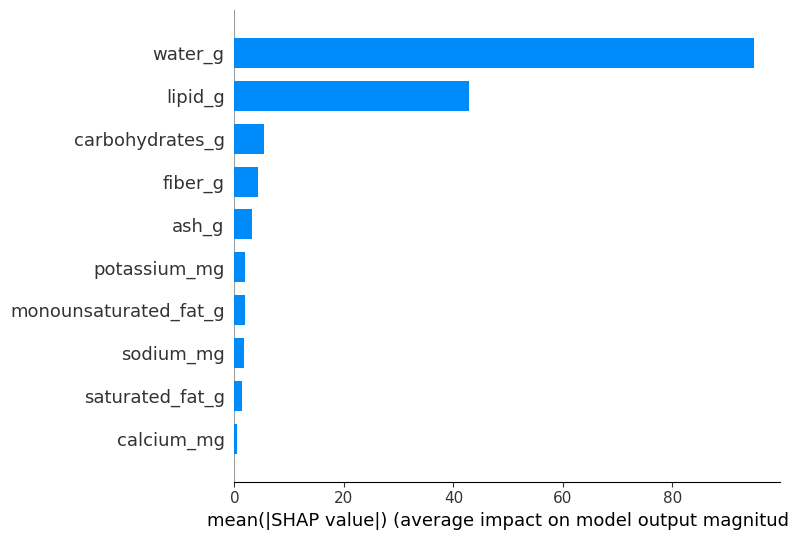

In [3]:

shap.summary_plot(shap_values[:,:,0], input_test, plot_type='bar', feature_names=input_test.columns)

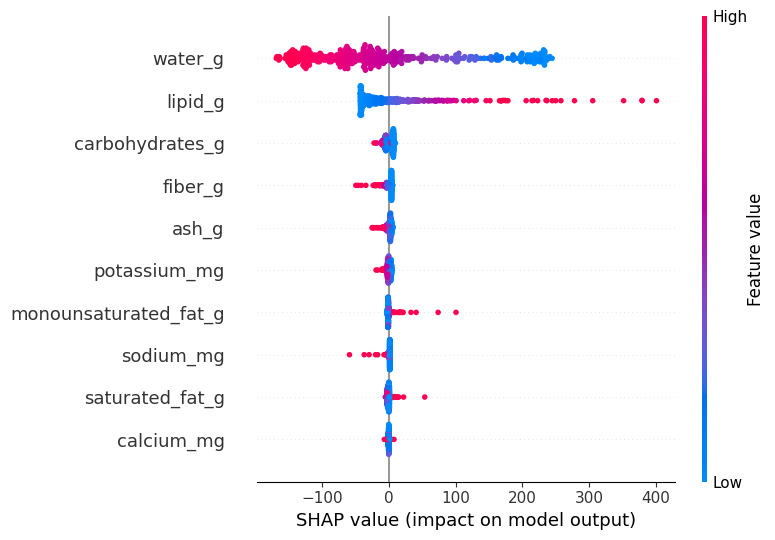

In [4]:
shap.summary_plot(shap_values[:,:,0], input_test, feature_names=input_test.columns)

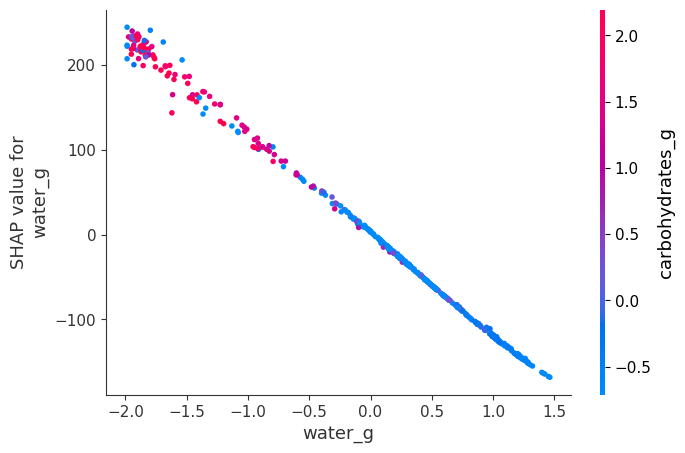

In [21]:
shap.dependence_plot('water_g', shap_values, input_test,interaction_index='carbohydrates_g')